In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
articles = pd.read_csv('C:/Users/kariu/OneDrive/Desktop/H&M Product Recommendation/articles/articles.csv')
customers = pd.read_csv('C:/Users/kariu/OneDrive/Desktop/H&M Product Recommendation/customers/customers.csv')
transactions = pd.read_csv('C:/Users/kariu/OneDrive/Desktop/H&M Product Recommendation/transactions_train/transactions_train.csv')

In [3]:
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [4]:
transactions.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

## Articles Analysis

In [5]:
articles.drop_duplicates(inplace = True)
print(articles.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [6]:
articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [7]:
articles.drop_duplicates(inplace = True)

In [8]:
print(articles.perceived_colour_value_name.unique())
articles.loc[articles.perceived_colour_value_name == 'Undefined'] = 'Unknown'
print(articles.perceived_colour_value_name.unique())

['Dark' 'Light' 'Dusty Light' 'Medium Dusty' 'Bright' 'Medium' 'Undefined'
 'Unknown']
['Dark' 'Light' 'Dusty Light' 'Medium Dusty' 'Bright' 'Medium' 'Unknown']


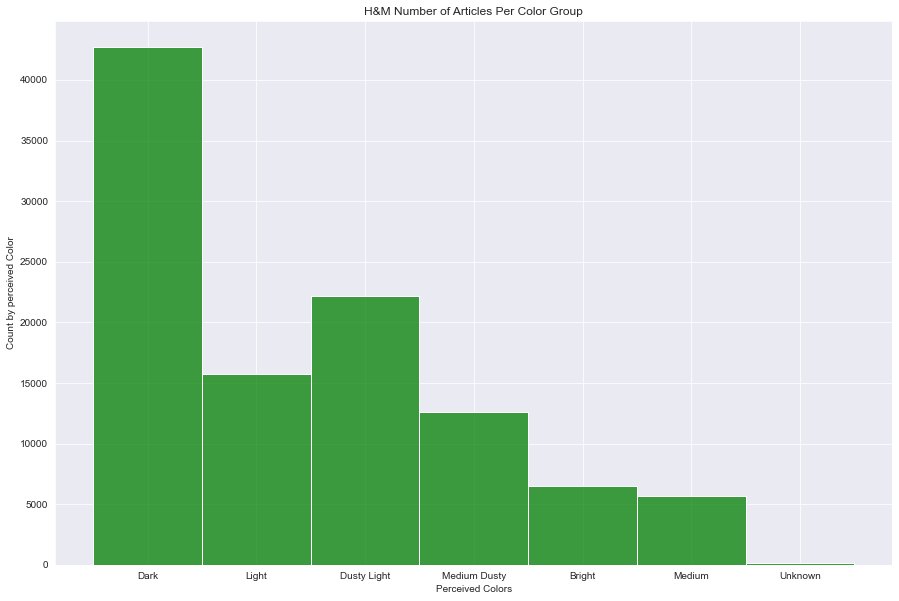

In [9]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize = (15, 10))
ax = sns.histplot(data = articles, x = 'perceived_colour_value_name', color = 'green')
ax.set_xlabel('Perceived Colors')
ax.set_ylabel('Count by perceived Color')
ax.set_title('H&M Number of Articles Per Color Group')
plt.show()

###### From the above diagram, majority of H&M products are Dark, followed by Dusty Light and Light

### Which articles are the best sellers?

In [10]:
bestsellers = transactions.groupby('article_id').count().sort_values(by = 'customer_id', ascending = False) 
bestsellers.head(5)

,t_dat,customer_id,price,sales_channel_id
article_id,,,,
706016001,50287,50287,50287,50287
706016002,35043,35043,35043,35043
372860001,31718,31718,31718,31718
610776002,30199,30199,30199,30199
759871002,26329,26329,26329,26329


In [11]:
50287/365

137.77260273972604

In [12]:
26329/365

72.13424657534246

#### The topseller article has an average of sales have an average sales of ~137 units per day. The bestseller ranked #5 has an average sales of 72 units per day, which is more than half of the sales of the top bestseller

In [13]:
sales = transactions.groupby('article_id').count()

def f(x):
    try:
        return sales.loc[x]['customer_id']
    except:
        return 0
articles['total_sales'] = articles['article_id'].apply(f)
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,total_sales
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,10841
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,7250
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,215
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",1044
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",539


In [14]:
to_drop = ['product_type_no',
          'graphical_appearance_no',
          'colour_group_code',
          'perceived_colour_value_id',
           'perceived_colour_master_id',
           'department_no',
           'index_code',
           'index_group_no',
           'section_no',
           'garment_group_no']
articles.drop(columns = to_drop, axis = 1, inplace = True)

In [15]:
articles.sort_values(by = 'total_sales', ascending = False).head(10)

,article_id,product_code,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,total_sales
53892,706016001,706016,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Solid,Black,Dark,Black,Trousers,Divided,Divided,Divided Collection,Trousers,High-waisted jeans in washed superstretch deni...,50287
53893,706016002,706016,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Solid,Light Blue,Light,Blue,Trousers,Divided,Divided,Divided Collection,Trousers,High-waisted jeans in washed superstretch deni...,35043
1713,372860001,372860,7p Basic Shaftless,Socks,Socks & Tights,Solid,Black,Dark,Black,Shopbasket Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit trainer socks in a soft cotton blend.,31718
24837,610776002,610776,Tilly (1),T-shirt,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,T-shirt in lightweight jersey with a rounded h...,30199
70221,759871002,759871,Tilda tank,Vest top,Garment Upper body,Solid,Black,Dark,Black,EQ Divided Basics,Divided,Divided,Divided Complements Other,Jersey Basic,"Cropped, fitted top in cotton jersey with narr...",26329
3711,464297007,464297,Greta Thong Mynta Low 3p,Underwear bottom,Underwear,Placement print,Black,Dark,Black,Casual Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",Thong briefs in cotton jersey with a wide lace...,25025
1714,372860002,372860,7p Basic Shaftless,Socks,Socks & Tights,Solid,White,Light,White,Shopbasket Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit trainer socks in a soft cotton blend.,24458
24836,610776001,610776,Tilly (1),T-shirt,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,T-shirt in lightweight jersey with a rounded h...,22451
2236,399223001,399223,Curvy Jeggings HW Ankle,Trousers,Garment Lower body,Solid,Black,Dark,Black,Denim Trousers,Divided,Divided,Ladies Denim,Trousers Denim,"Jeggings in washed, superstretch denim with a ...",22236
53894,706016003,706016,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Solid,Dark Blue,Medium Dusty,Blue,Trousers,Divided,Divided,Divided Collection,Trousers,High-waisted jeans in washed superstretch deni...,21241


###### The top two bestsellers are denim Trousers, with black colour having more sales than light blue. 8 out of the top 10 topsellers are Black.
##### There are 105542 distinct article_id in the articles dataset. Hence we define the top 1000 (~1%) articles with most sales as a bestseller.


In [16]:
bestsellers = articles.sort_values(by='total_sales', ascending=False).head(1000)

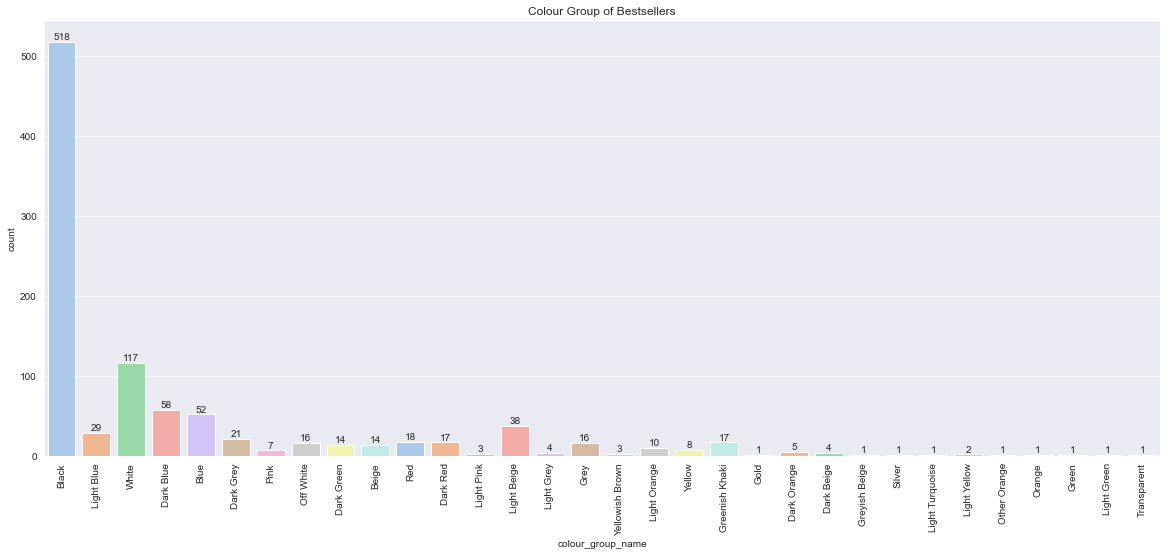

In [17]:
plt.figure(figsize = (20,8))
g = sns.countplot(data = bestsellers,
                  x ="colour_group_name", 
                  palette = "pastel")
g.bar_label(g.containers[0])
g.tick_params(axis = "x", rotation = 90)
plt.title("Colour Group of Bestsellers")
plt.show(g)

###### Black is the most popular colour followed by White

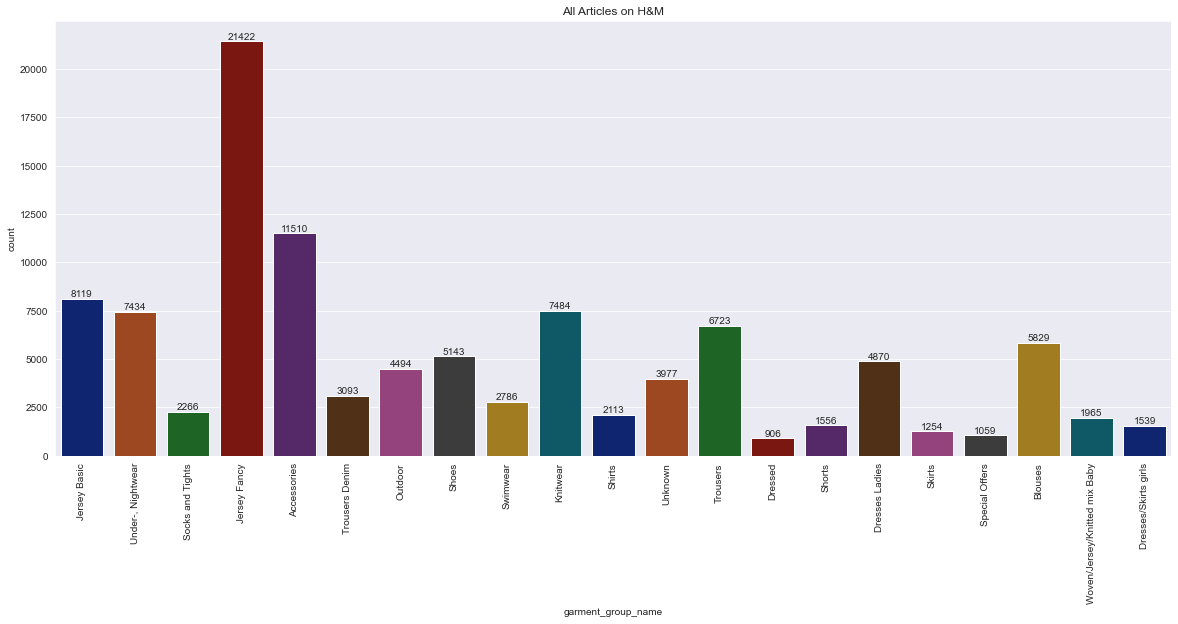

In [18]:
plt.figure(figsize = (20,8))
a = sns.countplot(x="garment_group_name",
                 data = articles,
                 palette = "dark")
a.bar_label(a.containers[0])
a.tick_params(axis = "x", rotation=90)
plt.title("All Articles on H&M")
plt.show(a)

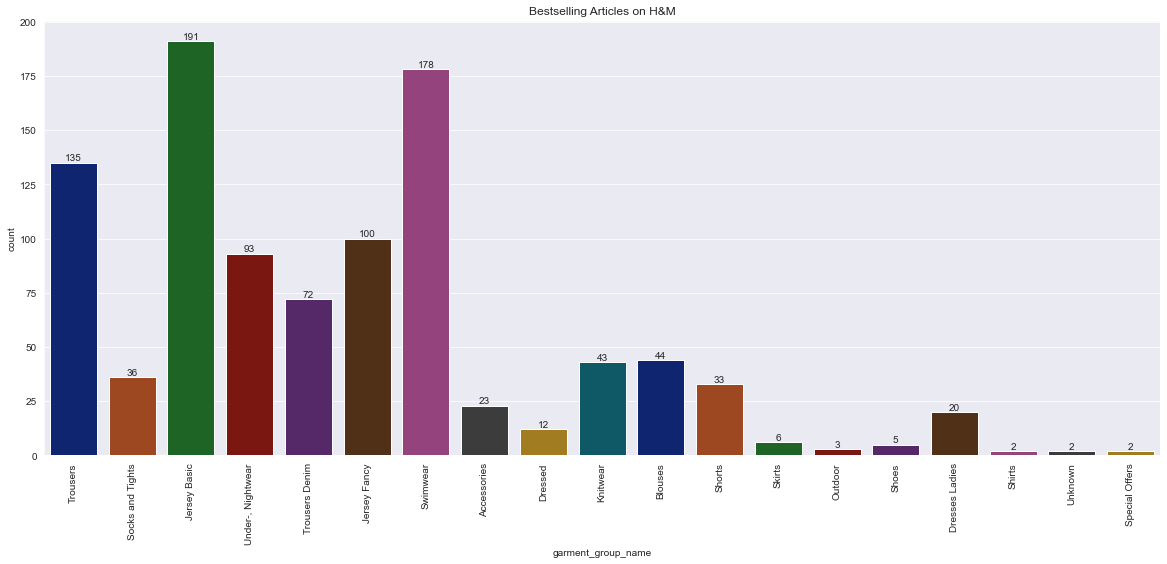

In [19]:
plt.figure(figsize = (20, 8))
b = sns.countplot(x = "garment_group_name",
                 data = bestsellers,
                 palette = "dark")
b.bar_label(b.containers[0])
b.tick_params(axis = "x", rotation = 90)
plt.title("Bestselling Articles on H&M")
plt.show(b)

###### H&M top three sellers are Swimwear, Jesery Basic and Trousers
###### In addition to that, Accessories is the number two sellers among all articles after Jersey Fancy although it does not consititue much of the bestsellers

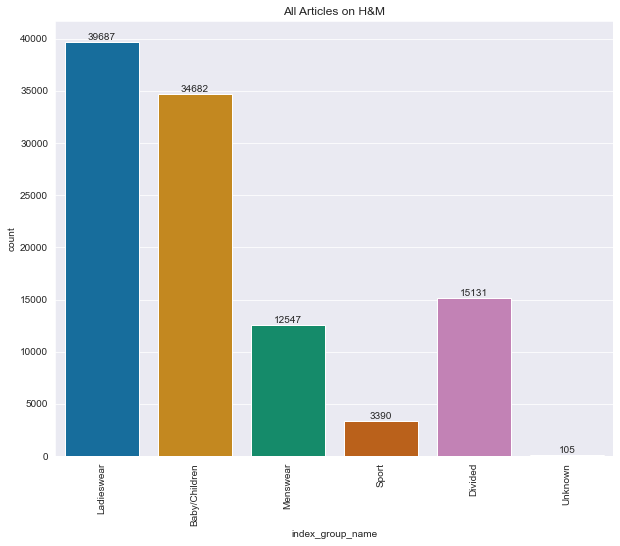

In [20]:
plt.figure(figsize = (10,8))
c = sns.countplot(x="index_group_name",
                 data = articles,
                 palette = "colorblind")
c.bar_label(c.containers[0])
c.tick_params(axis = "x", rotation = 90)
plt.title("All Articles on H&M")
plt.show(c)

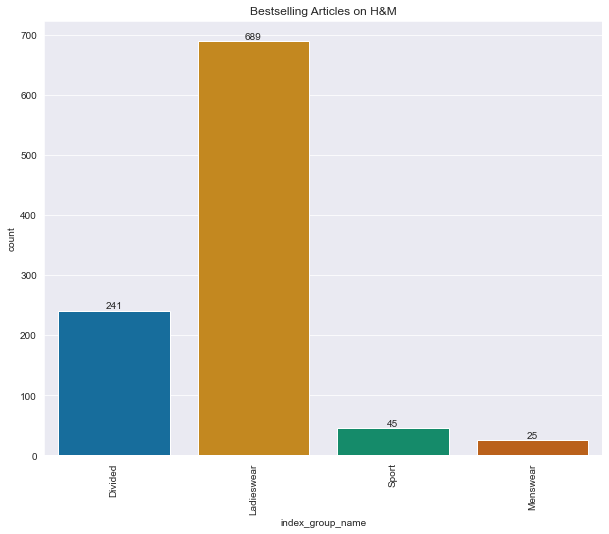

In [21]:
plt.figure(figsize = (10,8))
d = sns.countplot(x = "index_group_name",
                 data = bestsellers,
                 palette = "colorblind")
d.bar_label(d.containers[0])
d.tick_params(axis = "x", rotation = 90)
plt.title("Bestselling Articles on H&M")
plt.show(d)

###### A quick review at the official H&M website shows that it targets the feminine styles. We can see that the most bestselling articles were designed for the female audience. It is therefore safe to conclude that most sutomers that contribute to the sales of H&M articles belong to the female demographic. 
##### Although H&M produes alot of Baby articles, none of them mae it to the bestsellers

## Customers Analysis

In [22]:
customers.drop_duplicates(inplace = True)
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 83.7+ MB
None


##### Who contributes to the bestsellers

In [23]:
print(list(customers.columns))

['customer_id', 'FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']


In [24]:
bestsellers_transactions = transactions[transactions['article_id'].isin(bestsellers['article_id'])]
bestsellers_contributors = customers[customers['customer_id'].isin(bestsellers_transactions['customer_id'])]
bestsellers_contributors.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...


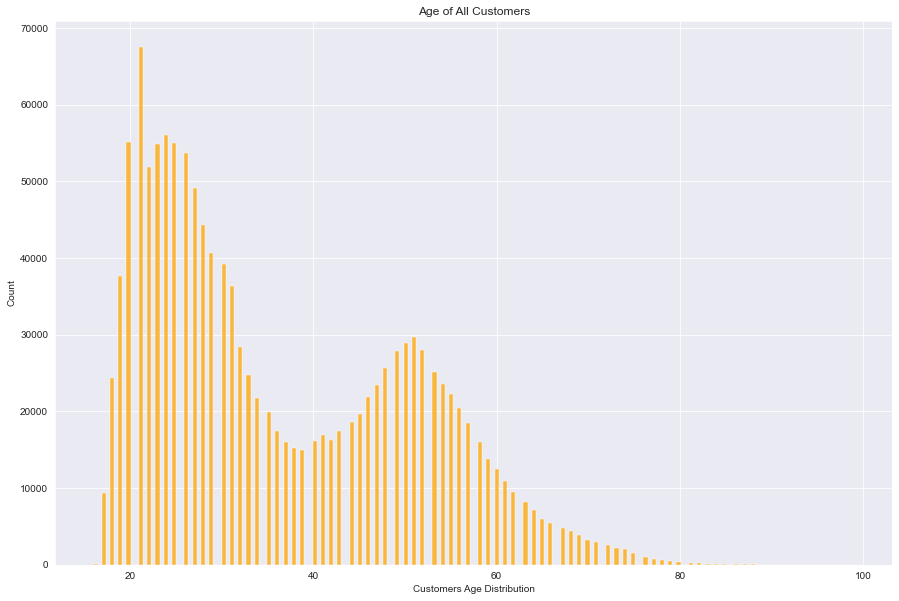

In [25]:
#Age Distribution
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))
sns.histplot(customers['age'],
            kde = False,
            color = "orange")
plt.xlabel('Customers Age Distribution')
plt.title("Age of All Customers")
plt.show()

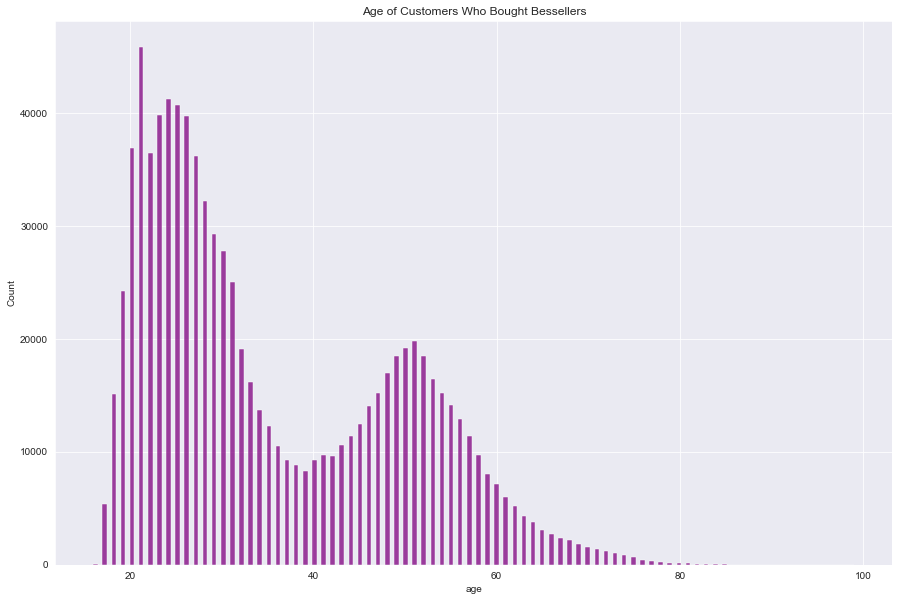

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))
sns.histplot(bestsellers_contributors['age'], 
             kde = False,
            color = "purple")
plt.title("Age of Customers Who Bought Bessellers")
plt.show()

###### Majority of the customers are around 20yrs to 30 yrs old. There is also a slight peak in customers who are around 50yrs old

##### Which articles generate the most revenue

In [27]:
transactions.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [28]:
article_revenue = transactions.groupby('article_id').sum()
article_revenue.drop(columns=['sales_channel_id'], inplace=True)
article_revenue_ranking = article_revenue.sort_values(by='price', ascending=False)
article_revenue_ranking.rename(columns={'price':'total_revenue'}, inplace=True)
article_revenue_ranking.head(10)

,total_revenue
article_id,
706016001,1631.732102
706016002,1136.321085
568601006,939.268593
448509014,781.478390
706016003,692.195915
399223001,686.484780
720125001,683.606542
562245046,656.213763
751471001,590.639949


##### The first two articles correspond to the top 2 bestsellers.

In [29]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_name',
       'product_group_name', 'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'index_group_name', 'section_name',
       'garment_group_name', 'detail_desc', 'total_sales'],
      dtype='object')

In [30]:
#add revenue data
article_revenue = transactions.groupby('article_id').sum()

def g(x):
    try:
        return article_revenue.loc[x]['price']
    except:
        return 0
articles['total_revenue'] = articles['article_id'].apply(f)
articles.head(10)

,article_id,product_code,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,total_sales,total_revenue
0,108775015,108775,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,10841,10841
1,108775044,108775,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,7250,7250
2,108775051,108775,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,215,215
3,110065001,110065,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",1044,1044
4,110065002,110065,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",539,539
5,110065011,110065,OP T-shirt (Idro),Bra,Underwear,Solid,Light Beige,Dusty Light,Beige,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",1090,1090
6,111565001,111565,20 den 1p Stockings,Underwear Tights,Socks & Tights,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo...",4911,4911
7,111565003,111565,20 den 1p Stockings,Socks,Socks & Tights,Solid,Beige,Medium Dusty,Beige,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo...",46,46
8,111586001,111586,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...,14191,14191
9,111593001,111593,Support 40 den 1p Tights,Underwear Tights,Socks & Tights,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,"Semi shiny tights that shape the tummy, thighs...",13888,13888


In [31]:
top_performers = articles.sort_values(by='total_revenue', ascending=False)
articles['bestseller_revenue'] = articles['article_id'].isin(top_performers['article_id']).astype(int) * articles['article_id'].isin(bestsellers['article_id']).astype(int)


In [32]:
print("Number of articles that are both bestselling and top performing:", articles['bestseller_revenue'].sum())

Number of articles that are both bestselling and top performing: 1000


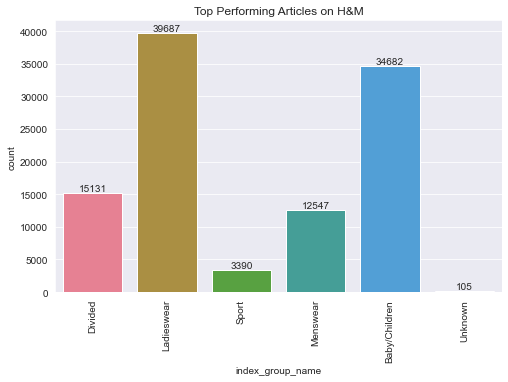

In [33]:
plt.figure(figsize=(8,5))
g = sns.countplot(x="index_group_name", 
                  data=top_performers,
                  palette="husl")
g.bar_label(g.containers[0])
g.tick_params(axis='x', rotation=90)
plt.title('Top Performing Articles on H&M')
plt.show(g)

##### Again, similar to bestseller, most customers that contribute to the revenue of H&M articles belong to the female demographic. Althpugh H&M produces a lob of Baby articles, none of them contribute to the to performers.
##### The distribution is similar to the bestsellers.

##### Let's see if the sales and revenues are correlated

In [34]:
articles['total_sales'].corr(articles['total_revenue'])

0.9999999999999999

##### They are strongly correlated

##### Revenue by index_group_name

In [35]:
index_group_revenue = articles[['index_group_name','total_revenue']].groupby('index_group_name').total_revenue.sum().reset_index()
index_group_revenue

,index_group_name,total_revenue
0,Baby/Children,1216615
1,Divided,7135322
2,Ladieswear,20397998
3,Menswear,1771016
4,Sport,1246346
5,Unknown,0


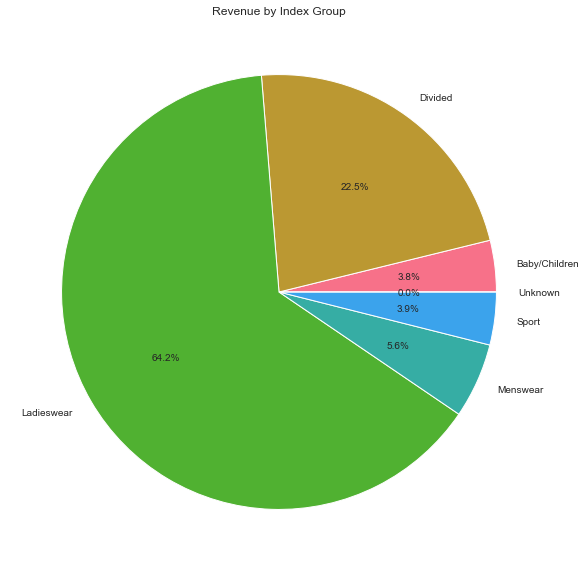

In [36]:
plt.figure(figsize = (10,10))
colors = sns.color_palette("husl")
plt.pie(x = index_group_revenue['total_revenue'], labels = index_group_revenue['index_group_name'], colors=colors, autopct='%1.1f%%')
plt.title('Revenue by Index Group')
plt.show()

##### Ladieswear and Divident, which are feminine styles contribute 86.7% of the revenue

#### #1 bestseller/top performer

In [37]:
list(articles[articles['article_id'] == 706016001]['detail_desc'])[0]

'High-waisted jeans in washed superstretch denim with a zip fly and button, fake front pockets, real back pockets and super-skinny legs.'

Text(0.5, 1.0, 'Club Member Status')

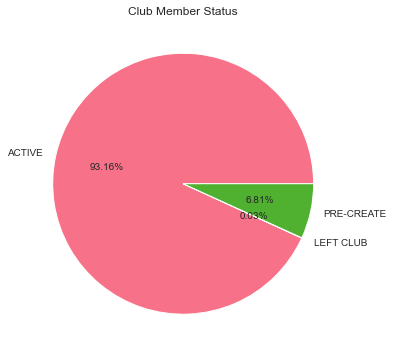

In [38]:
#Club Member Status
pastel_color = sns.color_palette('husl')
data = customers.groupby('club_member_status').count()
plt.subplots(figsize = (6,6))
plt.pie(data.customer_id, labels = data.index, colors = pastel_color, autopct = '%.2f%%')
plt.title('Club Member Status')

## Transaction Analysis

In [39]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB
None


In [40]:
import datetime as dt

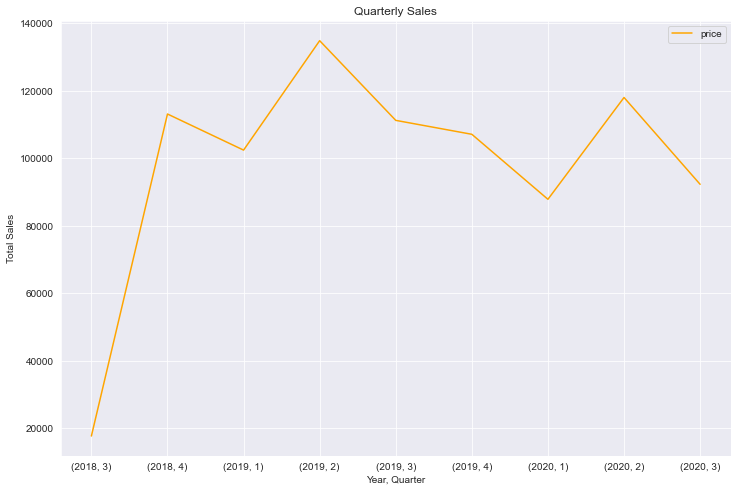

In [41]:
transactions.t_dat = pd.to_datetime(transactions.t_dat)
transactions['quarter'] = transactions.t_dat.dt.quarter
transactions['year'] = transactions.t_dat.dt.year
transactions[['year', 'quarter', 'price']].groupby(['year', 'quarter']).sum().plot(kind='line', color = 'orange', figsize = (12,8))
plt.xlabel('Year, Quarter')
plt.ylabel('Total Sales')
plt.title('Quarterly Sales')
plt.show()

##### Q2 generates the most revenue

#### Number of transactions by index and product categories

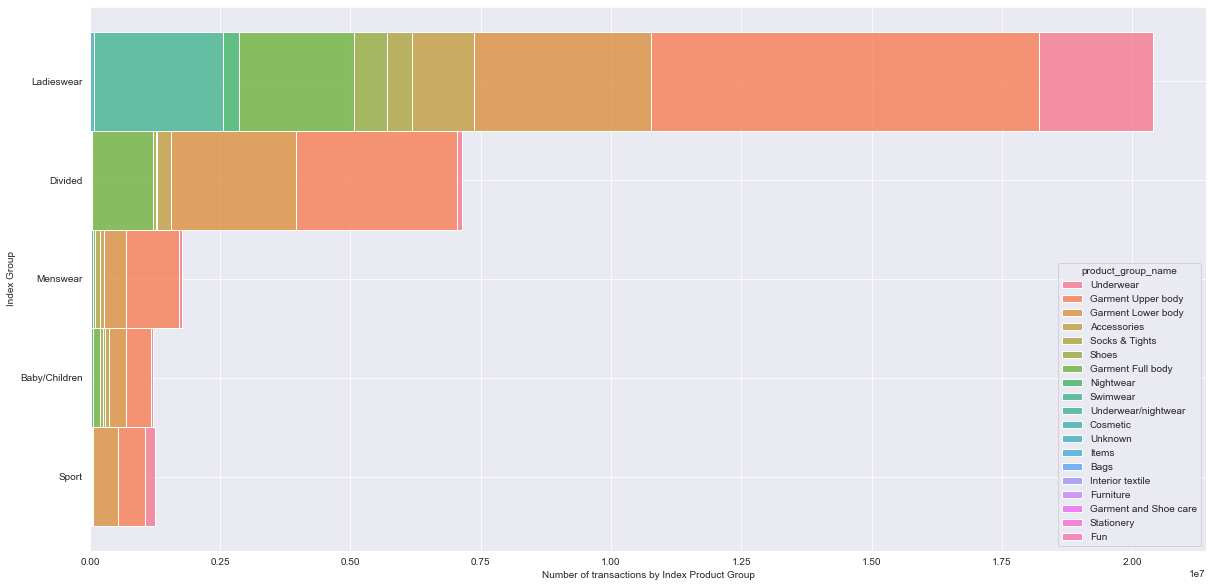

In [42]:
transactions_articles = transactions.merge(articles[['article_id', 
                                         'prod_name', 
                                         'product_group_name',
                                         'index_group_name']], 
                               on = 'article_id', 
                               how = 'left')
sns.set_style("darkgrid")
plt.subplots(figsize = (20,10))
sns.histplot(data = transactions_articles, 
             y = 'index_group_name', 
             hue = 'product_group_name', 
             multiple = 'stack')
plt.xlabel('Number of transactions by Index Product Group')
plt.ylabel('Index Group')
plt.show()

##### The best selling index group is ladieswear. Most of the best selling ladieswear products are upper & lower body garments. Upper & lower body garments are also sold for the rest of the index groups

#### Let's look at what kind of customers purchase ladieswear products

In [43]:
customers_transactions_articles = transactions_articles.merge(customers, on = 'customer_id', how = 'left')
customers_transactions_articles.head(10)

,t_dat,customer_id,article_id,price,sales_channel_id,quarter,year,prod_name,product_group_name,index_group_name,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,3,2018,Atlanta Push Body Harlow,Underwear,Ladieswear,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,3,2018,Rae Push (Melbourne) 2p,Underwear,Ladieswear,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,3,2018,Inca Jumper,Garment Upper body,Divided,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,3,2018,W YODA KNIT OL OFFER,Garment Upper body,Ladieswear,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,3,2018,W YODA KNIT OL OFFER,Garment Upper body,Ladieswear,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
5,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,2,3,2018,W YODA KNIT OL OFFER,Garment Upper body,Ladieswear,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
6,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,2,3,2018,Inca jumper,Garment Upper body,Divided,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
7,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,688873012,0.030492,1,3,2018,Gyda!,Garment Upper body,Ladieswear,NaN,NaN,ACTIVE,NONE,29.0,24e3594738f327e8a7671ec6d1e18b308fb0282e1f7e23...
8,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,501323011,0.053373,1,3,2018,Thomas paperbag wide,Garment Lower body,Ladieswear,NaN,NaN,ACTIVE,NONE,29.0,24e3594738f327e8a7671ec6d1e18b308fb0282e1f7e23...
9,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,598859003,0.045746,2,3,2018,Fiona Wide,Garment Lower body,Ladieswear,NaN,NaN,ACTIVE,NONE,29.0,24e3594738f327e8a7671ec6d1e18b308fb0282e1f7e23...


In [44]:
#Age groups
def age_categories(age):
    if age is None:
        return "unknown"
    elif age >= 60:
        return "above 60"
    elif age <= 59 and age >= 50:
        return "50-59"
    elif age <= 49 and age >= 40:
        return "40-49"
    elif age <= 39 and age >= 30:
        return "30-39"
    elif age <=29 and age >= 21:
        return "21-29"
    else:
        return "below 21"
customers_transactions_articles['ages'] = customers_transactions_articles['age'].map(lambda x: age_categories(x))


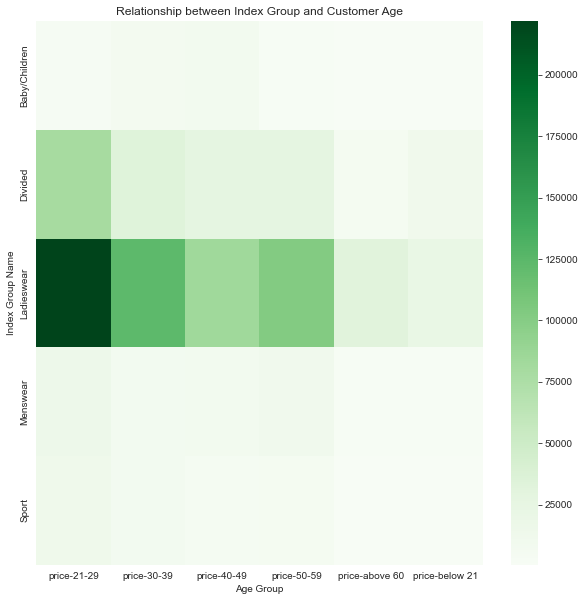

In [47]:
#Index Group vs Customer age
data = customers_transactions_articles[['index_group_name', 'ages', 'price']].groupby(['index_group_name','ages']).sum()
data = data.unstack().fillna(0)
plt.subplots(figsize = (10,10))
sns.heatmap(data, cmap="Greens")
plt.title("Relationship between Index Group and Customer Age")
plt.ylabel("Index Group Name")
plt.xlabel("Age Group")
plt.show()